In [1]:
import sys
import os
sys.path.append("..")

from generate_samples import SyntheticDAG
from models.causal_peeler_oracle import identify
from models.noise_estimator import estimate_noise
from data.visualize import show_results

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap

import torch
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/ryanwelch/opt/anaconda3/envs/ocrl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def PolynomialInstance(degree=2):
    return Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])

# Simulation on the Line Graph

In [7]:
DAG_type = 'line'
num_latent = 4
num_samples = 2000

graph = SyntheticDAG(num_latent, DAG_type)
G = torch.empty(4, 4).uniform_(-1, 1)

In [8]:
U, X, N = graph.sample_scaled(G, num_samples)

In [9]:
U_estimates, layers = identify(graph, U, G)
N_estimates = estimate_noise(U_estimates, layers, PolynomialInstance)

-----------------------------------------------------------
Removing Layer 0.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.35676732  0.29270204  0.66134227 -0.59132817]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[ 0.70023214 -0.71322438 -0.03139962]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.70719295  0.7070206 ]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 3.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Peeled off 1 nodes.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


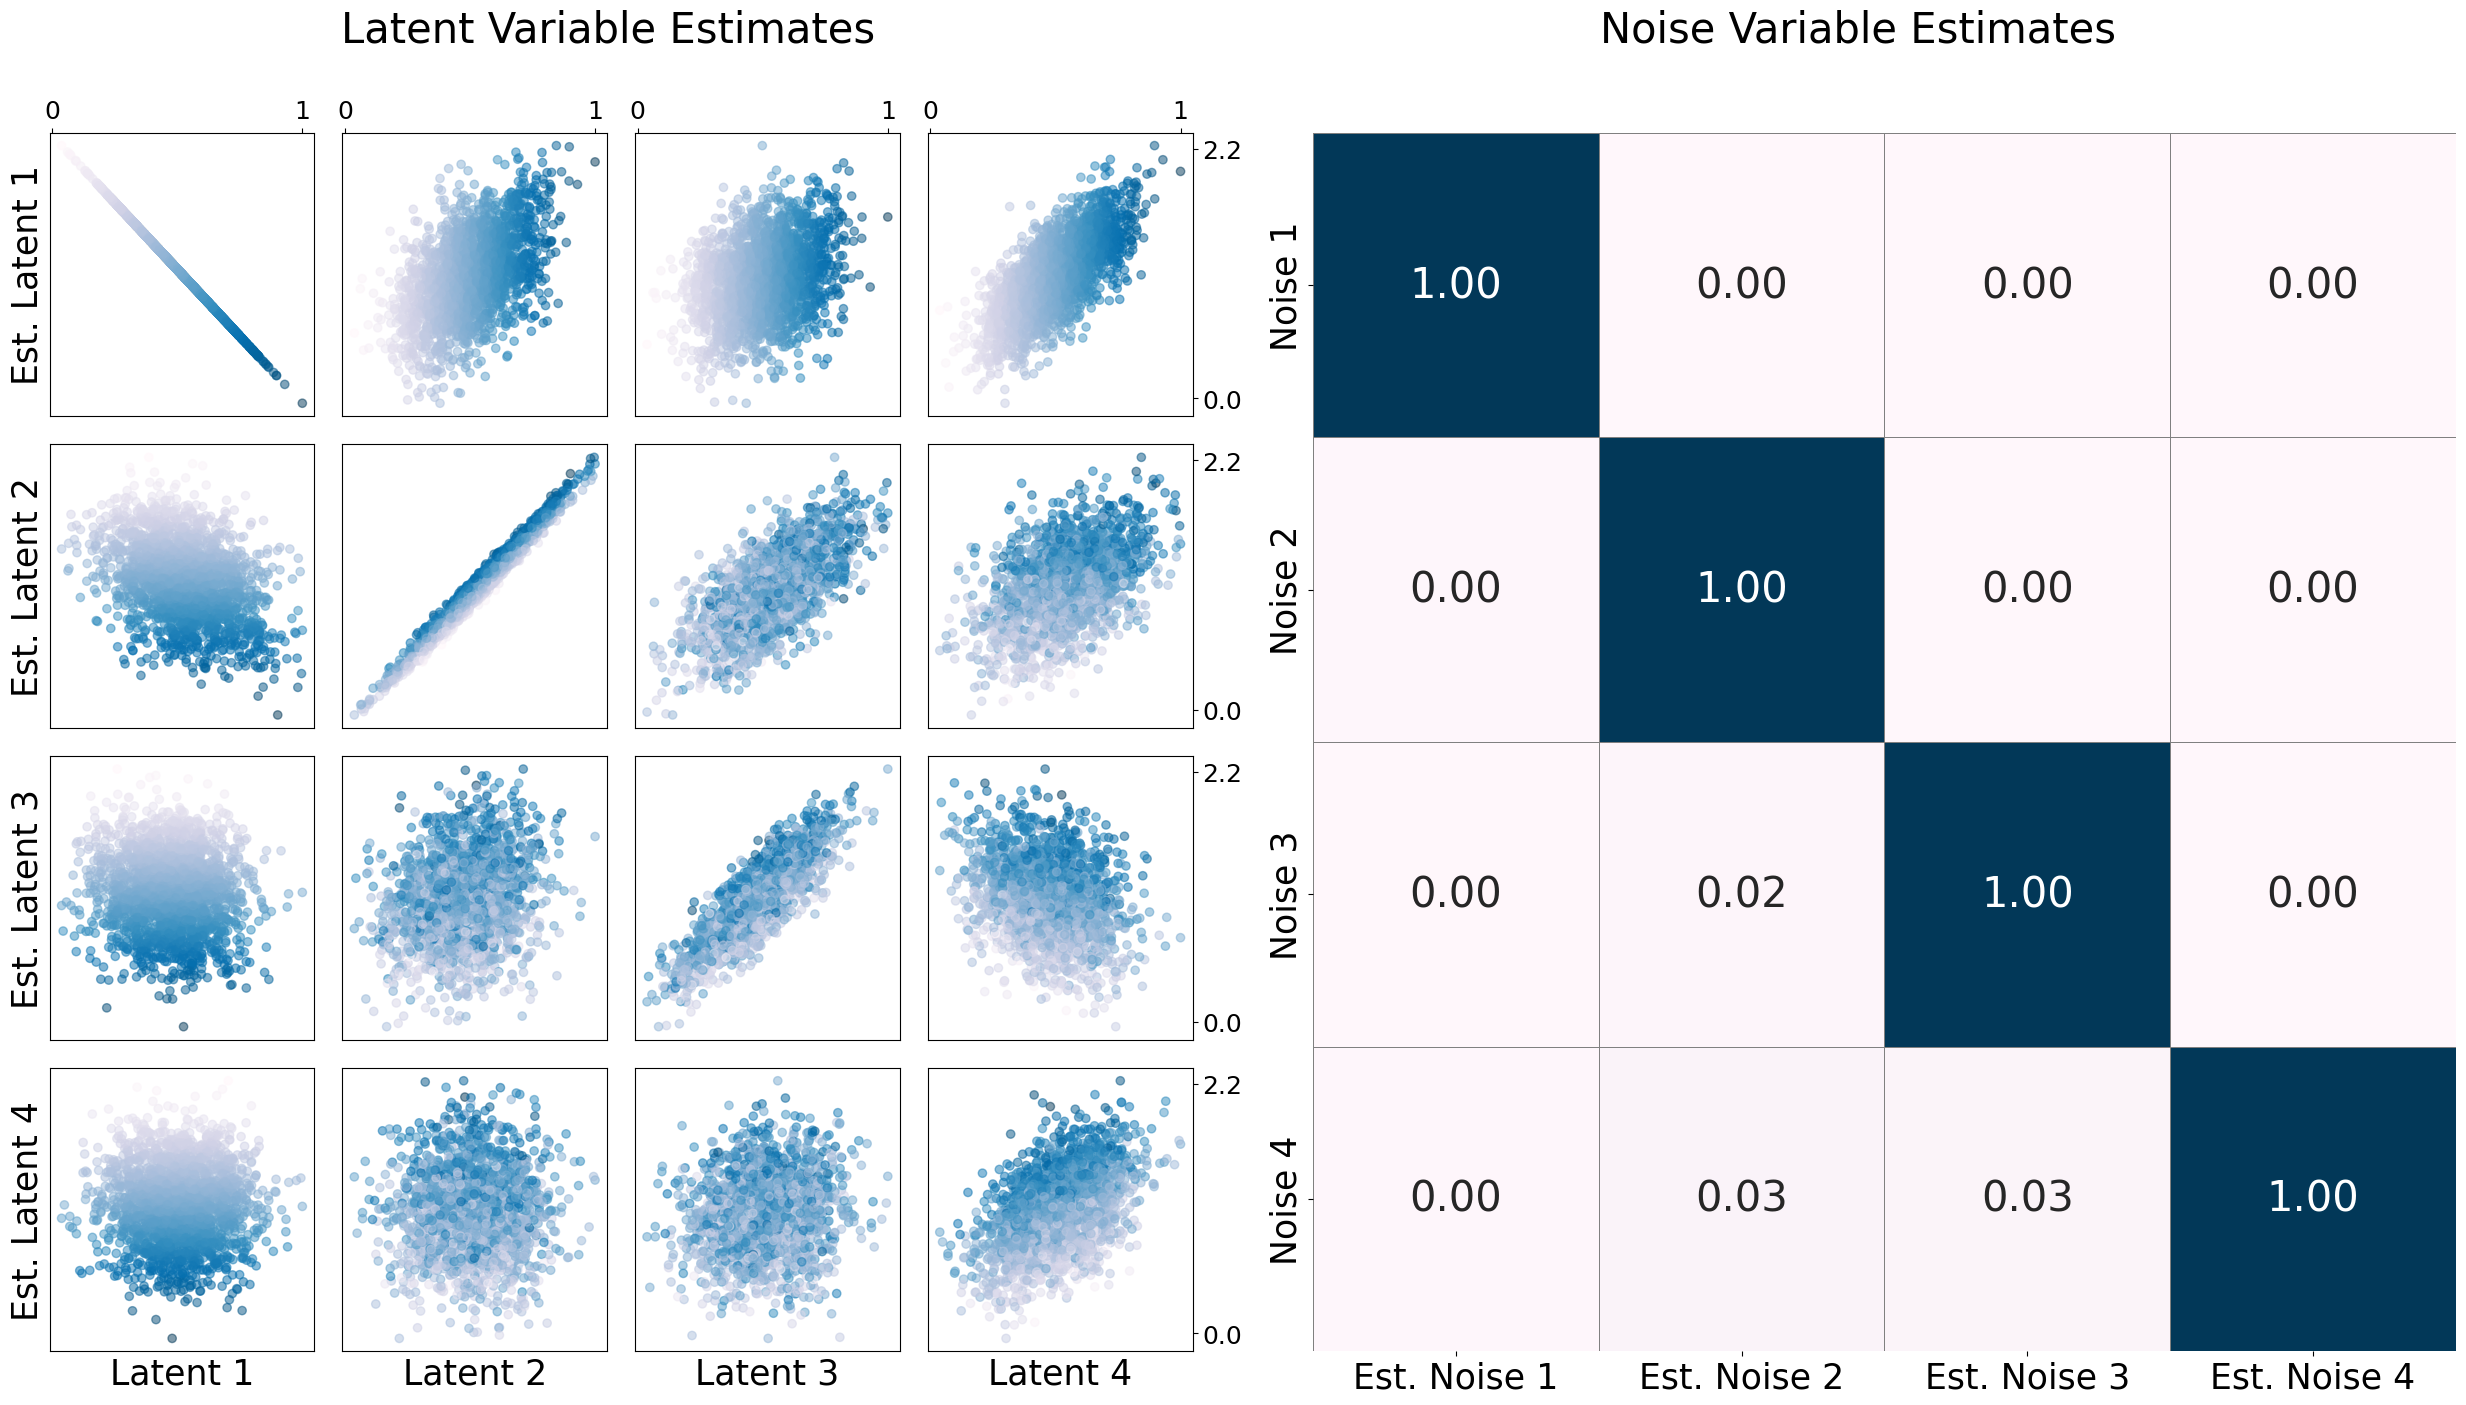

In [10]:
show_results(U, N, U_estimates, N_estimates)

# Simulation on the Y-Structure Graph

In [11]:
DAG_type = 'line'
num_latent = 4
num_samples = 2000

graph = SyntheticDAG(num_latent, DAG_type)
graph.DAG.add_arc(1,3)
graph.DAG.remove_arc(2,3)
G = torch.empty(4, 4).uniform_(-1, 1)

In [12]:
U, X, N = graph.sample_scaled(G, num_samples)

In [13]:
U_estimates, layers = identify(graph, U, G)
N_estimates = estimate_noise(U_estimates, layers, PolynomialInstance)

-----------------------------------------------------------
Removing Layer 0.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.15712316  0.13544969  0.90330886 -0.37549806]

Optimal solution found:
[ 0.77409061  0.56422269 -0.06610366 -0.27940435]

No feasible solution found.
Done.

Peeled off 2 nodes.
-----------------------------------------------------------
Removing Layer 1.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Done.

Finding Optimal G_hat...
Set parameter NonConvex to value 2


INFO:gurobipy:Set parameter NonConvex to value 2


Optimal solution found:
[-0.17217931 -0.98506573]

No feasible solution found.
Done.

Peeled off 1 nodes.
-----------------------------------------------------------
Removing Layer 2.
-----------------------------------------------------------
Calculating Jacobian Estimates...
Peeled off 1 nodes.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


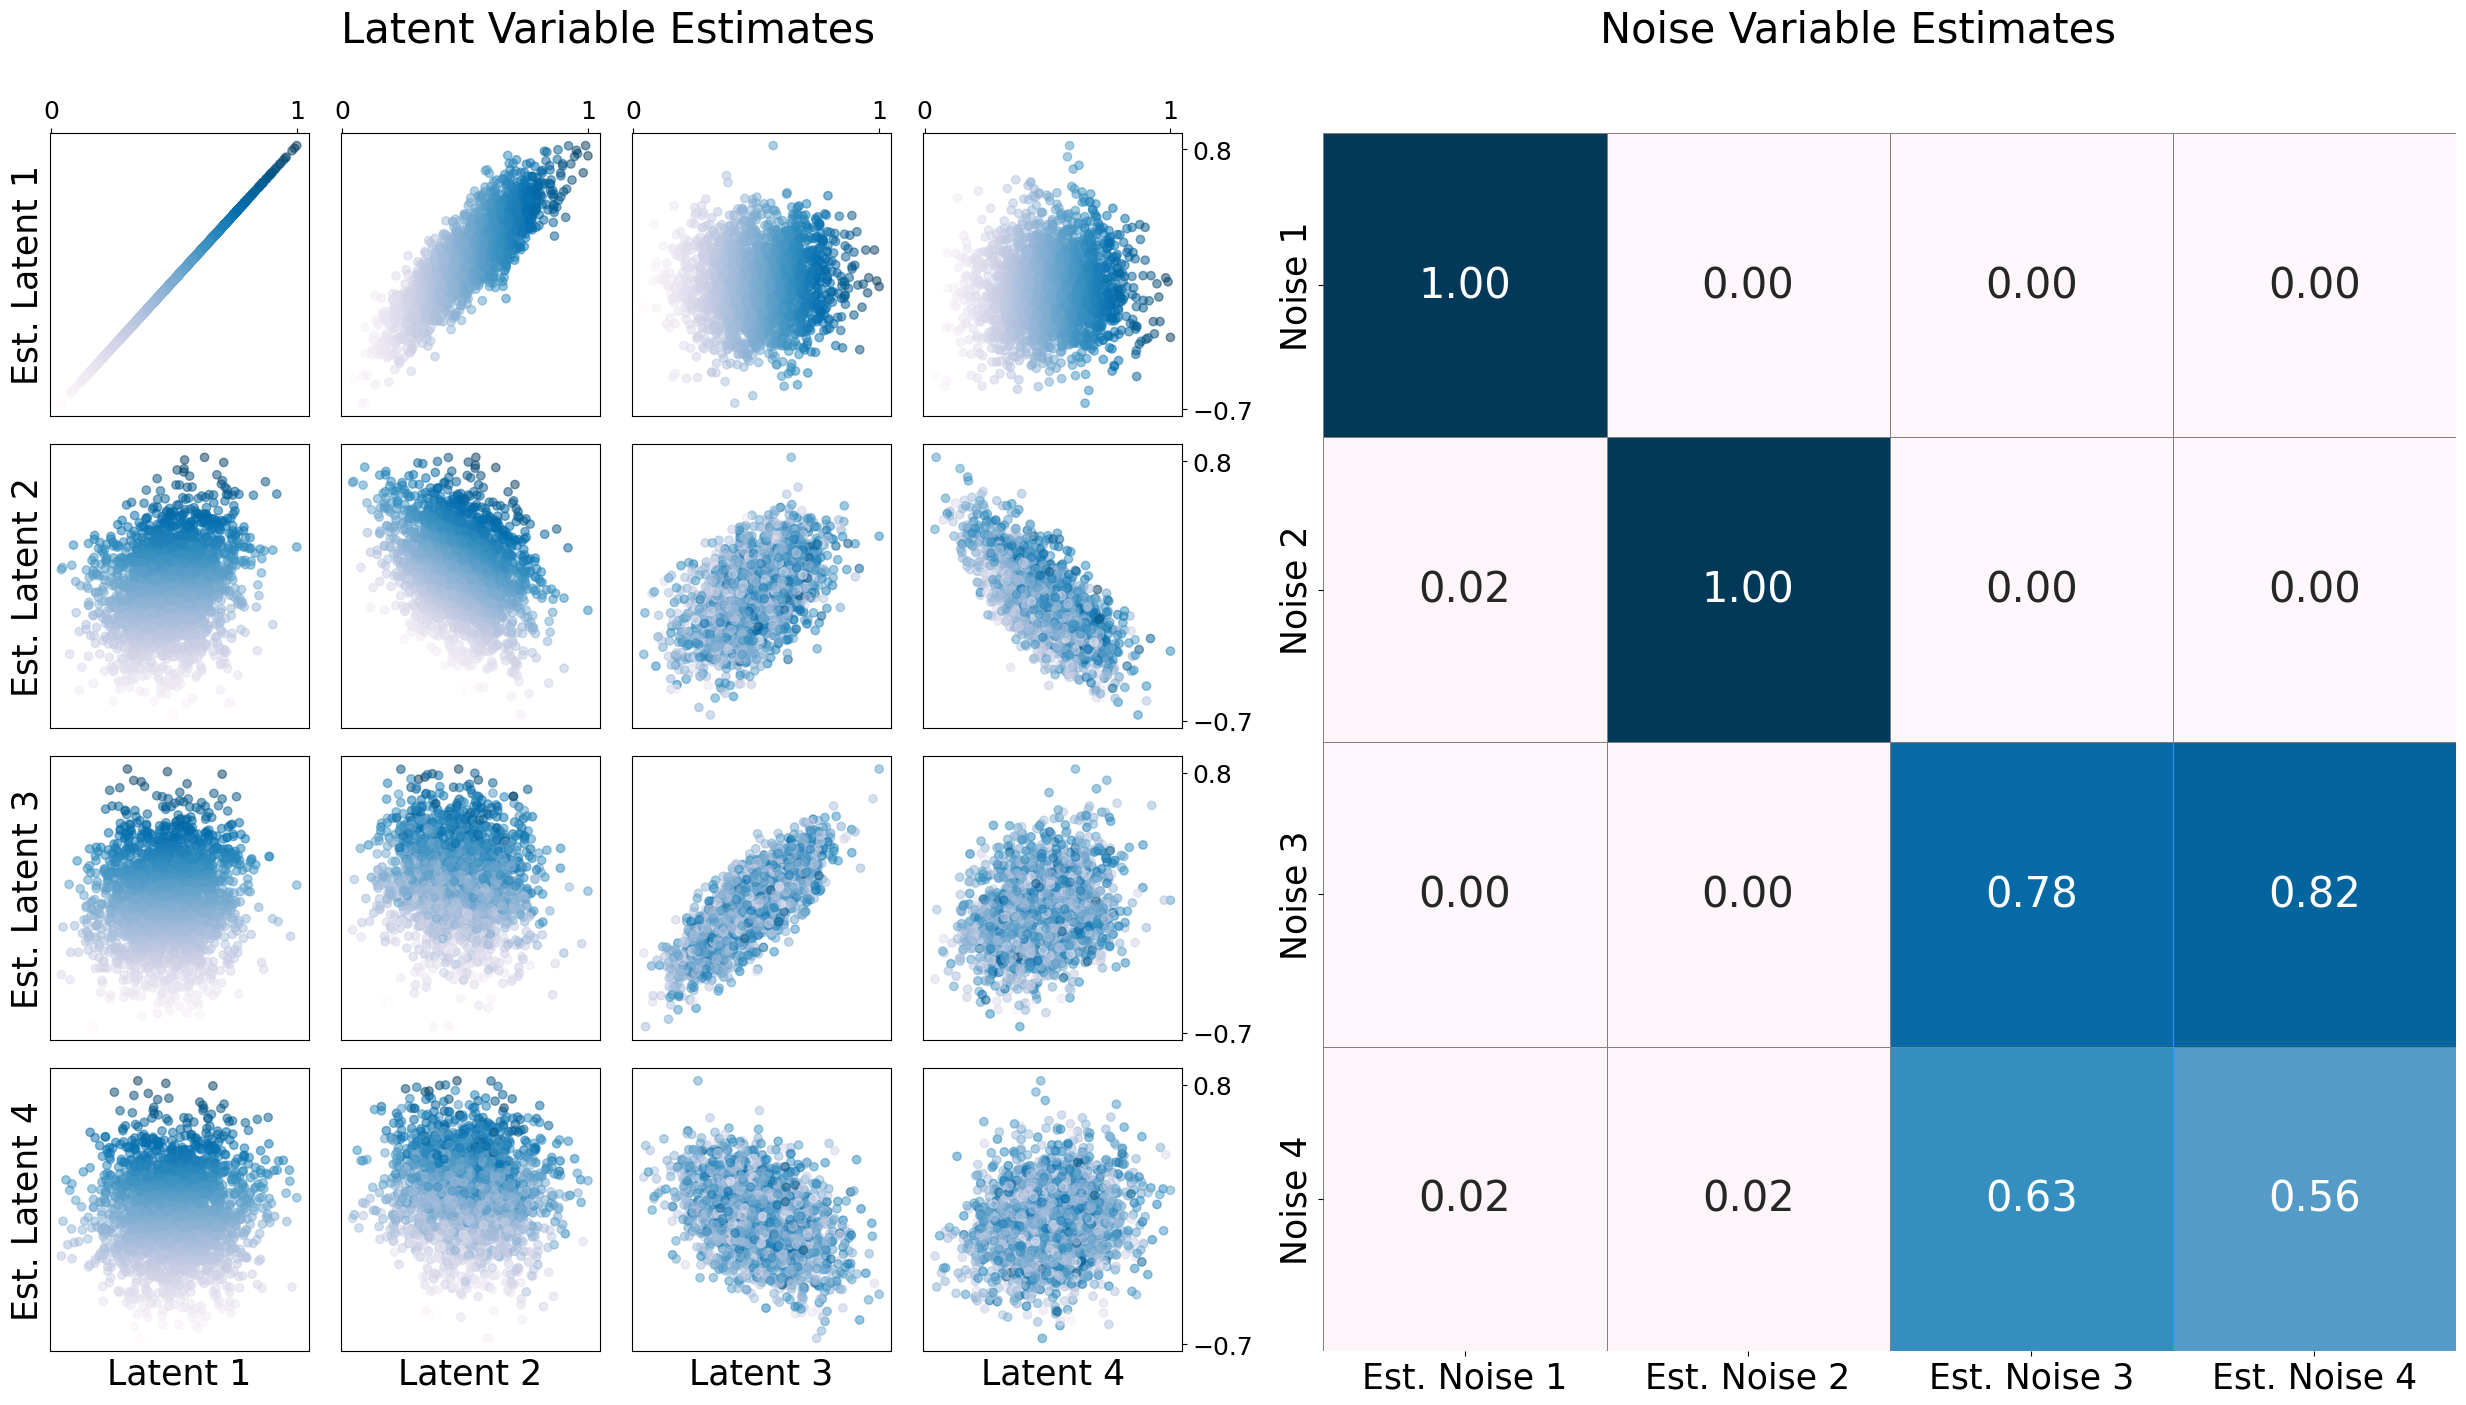

In [14]:
show_results(U, N, U_estimates, N_estimates)